**La secretaría de seguridad del municipio de Bucamaranga, necesita analizar según los datos obtenidos en los delítos de su localidad, cuales barrios son los mas peligrosos y que objetos, armas/medios se utilizan con mayor frecuencia. Esto le permitirá tomar medidas preventivas en los barrios mas vulnerables y tratar con estos objetos utilizados en los delitos.**

**A su vez, necesita saber cuantos delitos culminan en lesiones fatales y lesiones no fatales.**

**También tiene la impresión que en el Barrio "Centro" los delitos se han incrementado en estos años, y necesita saber si esto es correcto y en que mes del año ocurren con más frecuencia".**

**La secretaría presiente que las lesiones fatales están relacionadas al curso de vida de las victimas (si son jovenes, adultos, mayores, infantes).**

In [88]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Georreferenciación de los delitos ocurridos en el municipio de Bucaramanga según la modalidad, conducta, móvil del agresor, móvil de la víctima, comunas de ocurrencia, fatales, no fatales y violencia sexual desagregado por curso de vida, sexo, mes y día de ocurrencia. La información se obtuvo de: https://www.datos.gov.co/Seguridad-y-Defensa

In [122]:
df=pd.read_excel("delitosenbucaramanga.xlsx")
df.head()

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,50946,ARMA BLANCA / CORTOPUNZANTE,KENNEDY,7.153943,-73.136794,URBANA,01. Norte,2015,Enero,1,04. Jueves,ARTÍCULO 103. HOMICIDIO,HOMICIDIO,Lesiones fatales,28,04. Jovenes,UNION LIBRE,MASCULINO,A PIE,A PIE
1,50947,ARMA BLANCA / CORTOPUNZANTE,CABECERA DEL LLANO,7.116619,-73.109865,URBANA,12. Cabecera del Llano,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,40,05. Adultez,SOLTERO,MASCULINO,A PIE,A PIE
2,50948,ARMA BLANCA / CORTOPUNZANTE,VILLA MARIA,7.154916,-73.130231,URBANA,02. Nor Oriental,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,18,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
3,50949,ARMA BLANCA / CORTOPUNZANTE,VILLAS DE SAN IGNACIO,7.156274,-73.142024,URBANA,01. Norte,2015,Enero,1,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,37,05. Adultez,UNION LIBRE,FEMENINO,A PIE,A PIE
4,50950,ARMA BLANCA / CORTOPUNZANTE,GAITAN,7.130512,-73.131001,URBANA,04. Occidental,2015,Enero,1,04. Jueves,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,18,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE


In [90]:
df.shape # posee 80502 filas y 20 columnas

(80502, 20)

In [91]:
df2=df.drop_duplicates()
print(df2.shape) # no se encuentran duplicados

(80502, 20)


In [92]:
df.isnull()

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80497,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
80498,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
80499,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
80500,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [124]:
df=df.drop(columns=["LATITUD","LONGITUD"]) #elimino estas columnas

In [125]:
df.columns

Index(['ORDEN', 'ARMAS_MEDIOS', 'BARRIOS_HECHO', 'ZONA', 'NOM_COMUNA', 'ANO',
       'MES', 'DIA', 'DIA_SEMANA', 'DESCRIPCION_CONDUCTA', 'CONDUCTA',
       'CLASIFICACIONES DELITO', 'EDAD', 'CURSO_DE_VIDA',
       'ESTADO_CIVIL_PERSONA', 'GENERO', 'MOVIL_AGRESOR', 'MOVIL_VICTIMA'],
      dtype='object')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80502 entries, 0 to 80501
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ORDEN                   80502 non-null  int64 
 1   ARMAS_MEDIOS            80502 non-null  object
 2   BARRIOS_HECHO           80502 non-null  object
 3   ZONA                    80502 non-null  object
 4   NOM_COMUNA              80502 non-null  object
 5   ANO                     80502 non-null  int64 
 6   MES                     80502 non-null  object
 7   DIA                     80502 non-null  int64 
 8   DIA_SEMANA              80502 non-null  object
 9   DESCRIPCION_CONDUCTA    80502 non-null  object
 10  CONDUCTA                80502 non-null  object
 11  CLASIFICACIONES DELITO  80502 non-null  object
 12  EDAD                    80502 non-null  object
 13  CURSO_DE_VIDA           80502 non-null  object
 14  ESTADO_CIVIL_PERSONA    80502 non-null  object
 15  GE

In [96]:
df.describe

<bound method NDFrame.describe of         ORDEN                 ARMAS_MEDIOS           BARRIOS_HECHO  \
0       50946  ARMA BLANCA / CORTOPUNZANTE                 KENNEDY   
1       50947  ARMA BLANCA / CORTOPUNZANTE      CABECERA DEL LLANO   
2       50948  ARMA BLANCA / CORTOPUNZANTE             VILLA MARIA   
3       50949  ARMA BLANCA / CORTOPUNZANTE   VILLAS DE SAN IGNACIO   
4       50950  ARMA BLANCA / CORTOPUNZANTE                  GAITAN   
...       ...                          ...                     ...   
80497  135072          SIN EMPLEO DE ARMAS      CABECERA DEL LLANO   
80498  135073                ARMA DE FUEGO  JARDINES DE COAVICONSA   
80499  135074                ARMA DE FUEGO                PROVENZA   
80500  135075  ARMA BLANCA / CORTOPUNZANTE            TOLEDO PLATA   
80501  135076                     PALANCAS          LA GRAN LADERA   

             ZONA              NOM_COMUNA   ANO        MES  DIA   DIA_SEMANA  \
0          URBANA               01. Norte  20

# Se realiza un conteo de hechos por barrio para ver cuales tienen más delitos

In [97]:
barrios_count = df['BARRIOS_HECHO'].value_counts()
print(barrios_count)


CENTRO                6789
CABECERA DEL LLANO    3812
SAN FRANCISCO         3447
LA CONCORDIA          3044
SAN ALONSO            2045
                      ... 
VRDA  SAN ISIDRO         1
NIZA                     1
RUITOQUE BAJO            1
ANTIGUO COLOMBIA         1
CAMPESTRE                1
Name: BARRIOS_HECHO, Length: 479, dtype: int64


# Top 10 de barrios con más delitos 

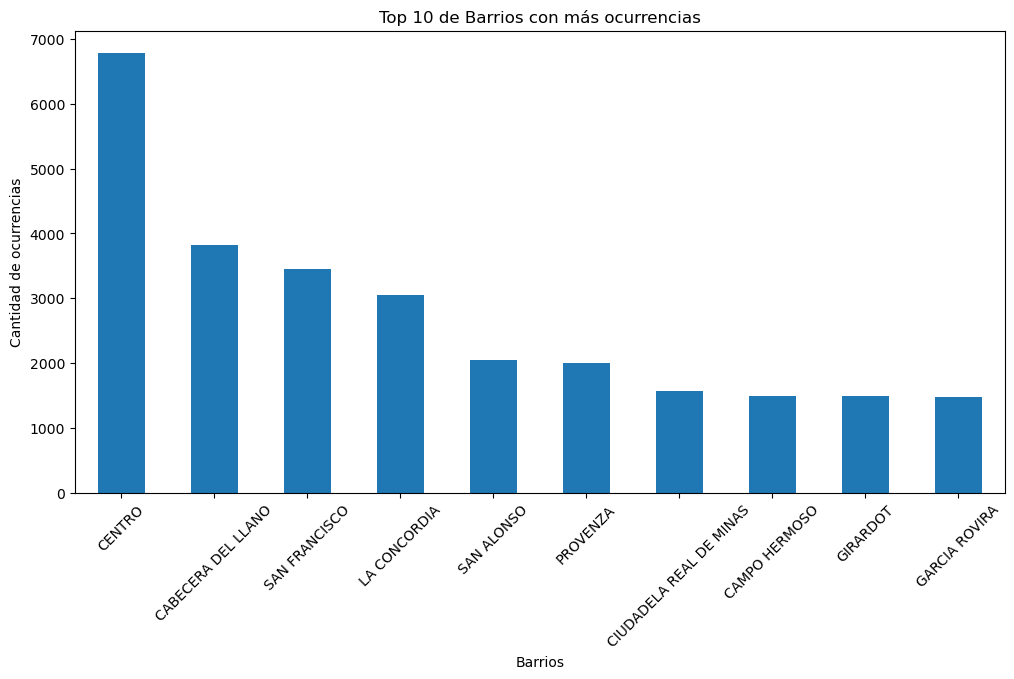

In [98]:
top_10_barrios = barrios_count.head(10)

plt.figure(figsize=(12, 6))
top_10_barrios.plot(kind='bar')

plt.xlabel('Barrios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Top 10 de Barrios con más ocurrencias')
plt.xticks(rotation=45)

plt.show()

Mediante un conteo, se pudo analizar que el "CENTRO" es el lugar con mas delitos notificados, se utilizo solo el top 10, ya que son muchos barrios a calcular.

# Se realiza un conteo de armas y medios utilizados para cometer los delitos

In [99]:
armas_count = df['ARMAS_MEDIOS'].value_counts()
print(armas_count)

SIN EMPLEO DE ARMAS                   28549
CONTUNDENTES                          18525
ARMA BLANCA / CORTOPUNZANTE           14284
VEHICULO                               5737
ARMA DE FUEGO                          5452
MOTO                                   3715
LLAVE MAESTRA                          1632
PALANCAS                               1016
NO REPORTADO                            604
ESCOPOLAMINA                            397
LLAMADA TELEFONICA                      163
PERRO                                    62
REDES SOCIALES                           54
DIRECTA                                  40
PUNZANTES                                36
ACIDO                                    32
CORTANTES                                26
BICICLETA                                22
ARMA TRAUMATICA                          17
MIXTA                                    13
MEDICAMENTOS                             12
GASES                                    12
COMBUSTIBLE                     

# Se realiza un top 10 de armas medios

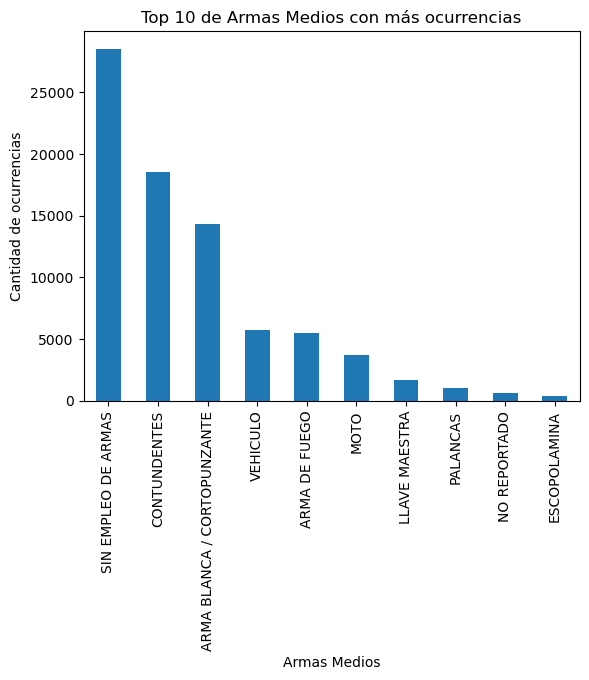

In [100]:
top_10_armas_medios = armas_count.head(10)
top_10_armas_medios.plot(kind='bar')
plt.xlabel('Armas Medios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Top 10 de Armas Medios con más ocurrencias')
plt.xticks(rotation=90)

plt.show()

Se realizó un top 10 de las mayores armas utilizadas en los delitos notificados, y se llegó al resultado que la mayoria de los delitos se realizaron sin armas u objetos.

# Groupby de  Barrios y Armas/medios

In [101]:
df.groupby('BARRIOS_HECHO')[['ARMAS_MEDIOS']].sum()

,ARMAS_MEDIOS
BARRIOS_HECHO,
12 DE OCTUBRE,CONTUNDENTESARMA BLANCA / CORTOPUNZANTECONTUND...
13 DE JUNIO,MOTOMOTOARMA BLANCA / CORTOPUNZANTEVEHICULOSIN...
20 DE JULIO,CONTUNDENTESARMA DE FUEGOARMA BLANCA / CORTOPU...
23 DE JUNIO,CONTUNDENTESCONTUNDENTESARMA BLANCA / CORTOPUN...
5 DE ENERO,CONTUNDENTESSIN EMPLEO DE ARMASARMA BLANCA / C...
...,...
centro,SIN EMPLEO DE ARMASMOTOCONTUNDENTESCONTUNDENTE...
chapinero,SIN EMPLEO DE ARMAS
la victoria,CONTUNDENTES


# Se grafican juntos los top 10 de armas/medios y Barrios

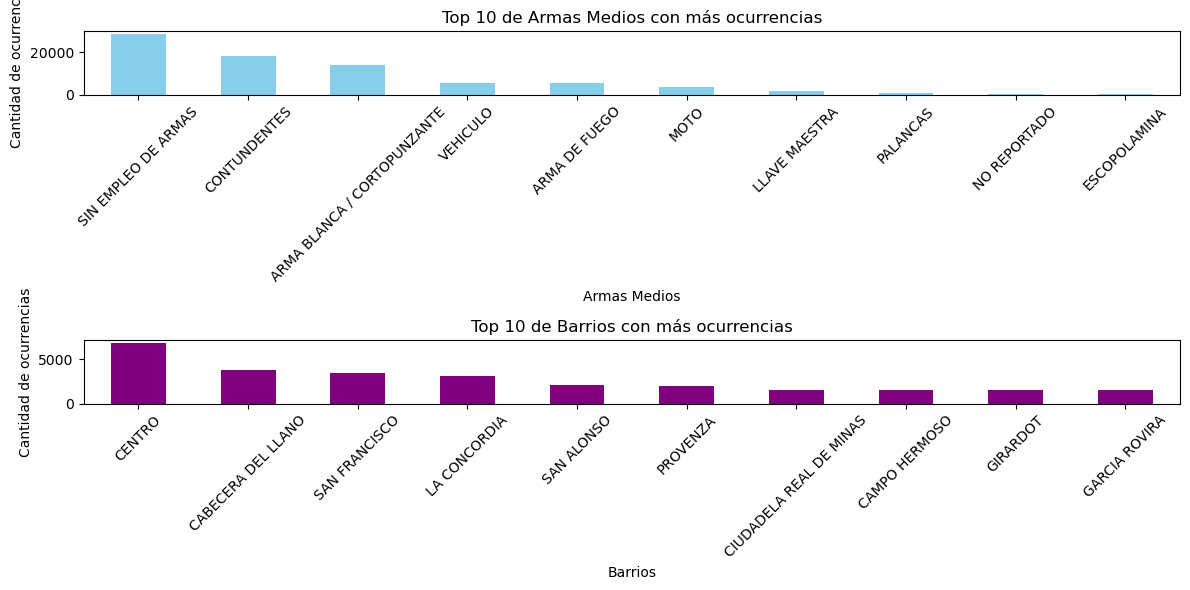

In [102]:
top_10_armas_medios = armas_count.head(10)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
top_10_armas_medios.plot(kind='bar', color='skyblue')
plt.xlabel('Armas Medios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Top 10 de Armas Medios con más ocurrencias')
plt.xticks(rotation=45)

top_10_barrios = barrios_count.head(10)

plt.subplot(2, 1, 2)
top_10_barrios.plot(kind='bar', color='purple')
plt.xlabel('Barrios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Top 10 de Barrios con más ocurrencias')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

# Top 3 de armas/medios utilizadas por top 3 de barrios con más delitos

In [103]:
conteo_armas = df['ARMAS_MEDIOS'].value_counts()
conteo_barrios = df['BARRIOS_HECHO'].value_counts()
top_armas = conteo_armas.nlargest(3).index
top_barrios = conteo_barrios.nlargest(3).index
df_filtrado = df[(df['ARMAS_MEDIOS'].isin(top_armas)) & (df['BARRIOS_HECHO'].isin(top_barrios))]
grupo = df_filtrado.groupby(['ARMAS_MEDIOS', 'BARRIOS_HECHO']).size().unstack(fill_value=0)

print(grupo)

BARRIOS_HECHO                CABECERA DEL LLANO  CENTRO  SAN FRANCISCO
ARMAS_MEDIOS                                                          
ARMA BLANCA / CORTOPUNZANTE                 585    1046            546
CONTUNDENTES                                624    1109            632
SIN EMPLEO DE ARMAS                        1905    3588           1277


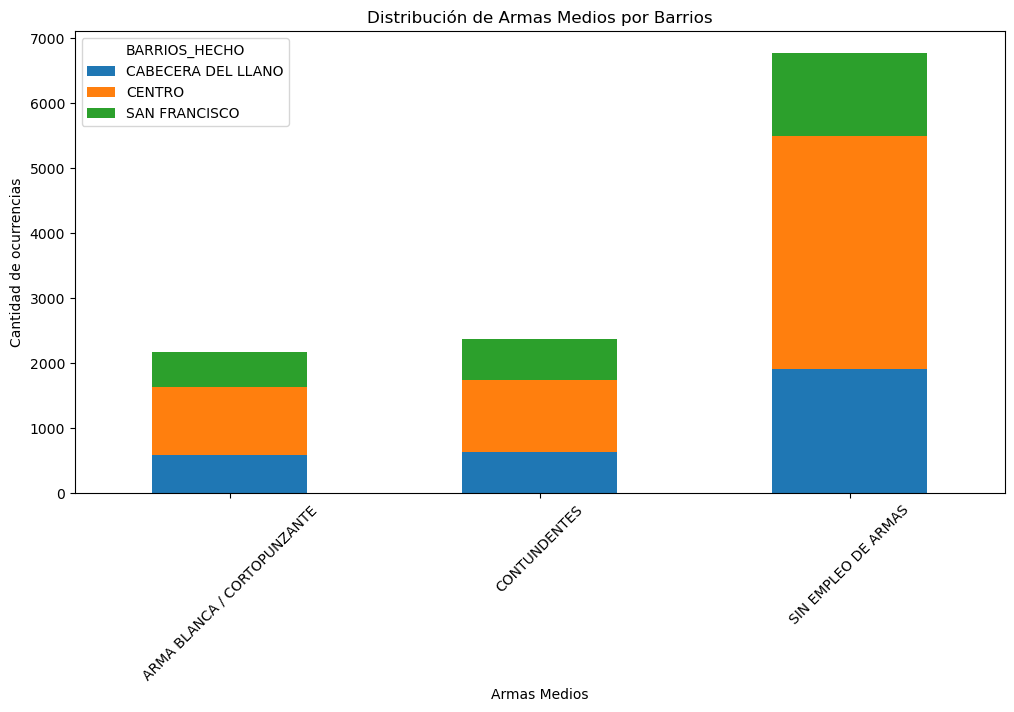

In [104]:
grupo.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Armas Medios')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Distribución de Armas Medios por Barrios')
plt.xticks(rotation=45)

plt.show()

Se realizó un top 3 con la mayor cantidad de armas/objetos utilizados en los barrios mas afectados, mediante este resultado, obtuvimos un grafico combinado que indica de forma sencilla la cantidad de delitos por barrio con su objeto cometido. Como resultado se obtuvo que la mayoria de los delitos se realizo sin empleo de armas en el barrio "Centro".

# Clasificaciones del delito

In [105]:
lesiones_count = df['CLASIFICACIONES DELITO'].value_counts()
print(lesiones_count)

Lesiones no fatales    77374
Violencia sexual        2135
Lesiones fatales         993
Name: CLASIFICACIONES DELITO, dtype: int64


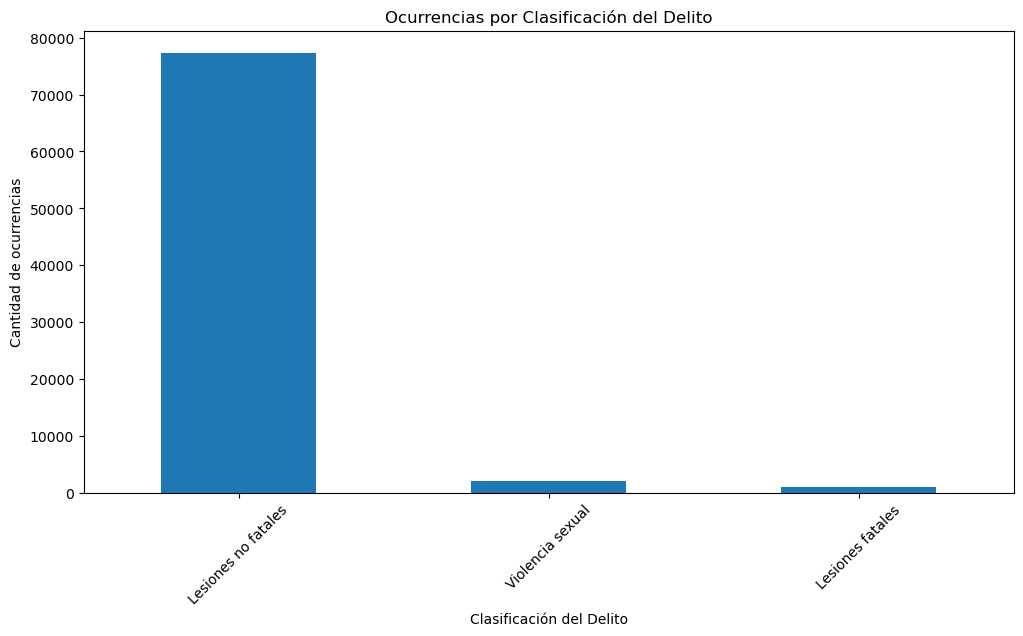

In [106]:
plt.figure(figsize=(12, 6))
lesiones_count.plot(kind='bar')
plt.xlabel('Clasificación del Delito')
plt.ylabel('Cantidad de ocurrencias')
plt.title('Ocurrencias por Clasificación del Delito')
plt.xticks(rotation=45)

plt.show()


Mediante un conteo de los datos, se determinó que la mayoria de los delitos culminan en lesiones no fatales.

# A su vez la secretaría cree que los delitos han crecido en el Barrio Centro a través de los años


Se utilizarán las variables "ANO" y "BARRIOS_HECHO" filtrando solamente el barrio "CENTRO" para verificar si se han incrementado los delitos en el mismo

In [126]:

df['ANO'] = pd.to_datetime(df['ANO'], format='%Y')

df['ANO'] = df['ANO'].dt.year
#se convierte la columna ANO a datatime

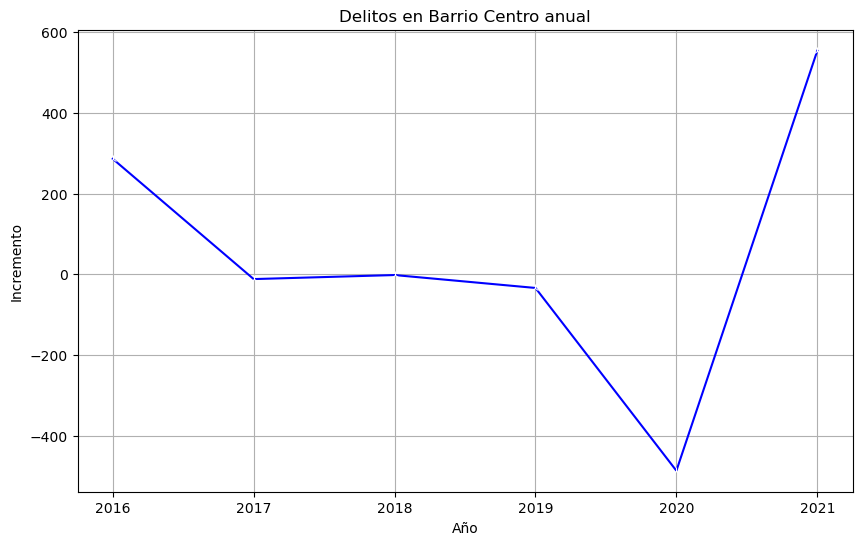

In [108]:

df_centro = df[df['BARRIOS_HECHO'] == 'CENTRO']
df_centro = df_centro.groupby('ANO').size().reset_index(name='Conteo')
df_centro['Incremento'] = df_centro['Conteo'].diff()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_centro, x='ANO', y='Incremento', marker='2', color='blue')
plt.title('Delitos en Barrio Centro anual')
plt.xlabel('Año')
plt.ylabel('Incremento')
plt.grid(True)

plt.show()


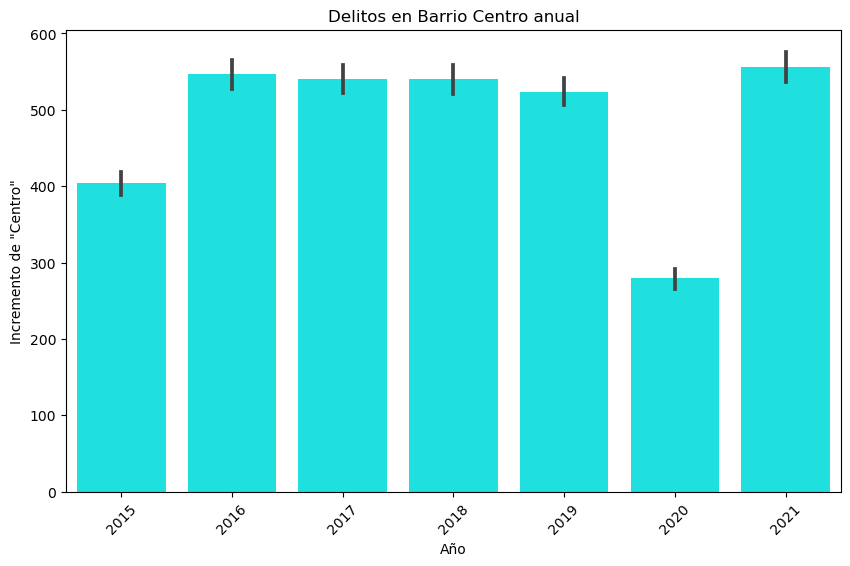

In [109]:

df_centro = df[df['BARRIOS_HECHO'] == 'CENTRO']

df_centro = df_centro.sort_values(by='ANO')
df_centro['Incremento'] = df_centro.groupby('ANO').cumcount()
plt.figure(figsize=(10, 6))
sns.barplot(x='ANO', y='Incremento', data=df_centro, color='cyan')
plt.title('Delitos en Barrio Centro anual')
plt.xlabel('Año')
plt.ylabel('Incremento de "Centro"')
plt.xticks(rotation=45)
plt.show()


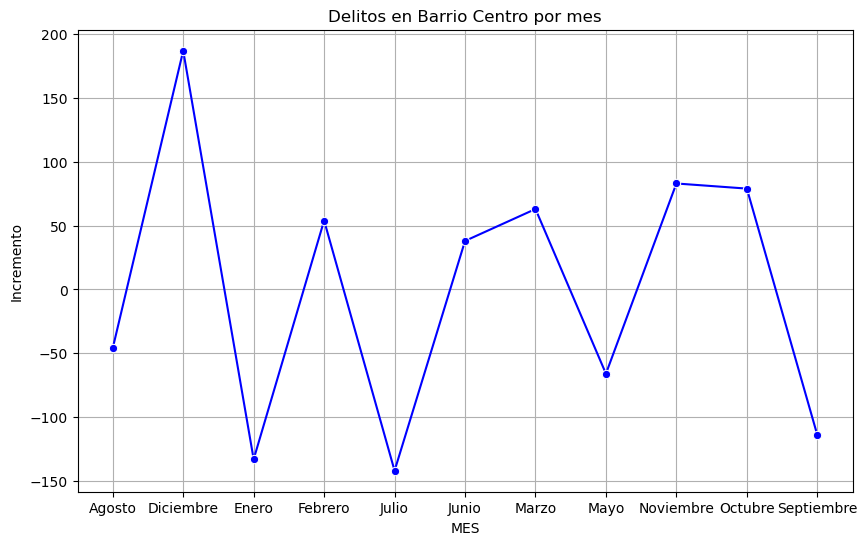

In [110]:
df_centro = df[df['BARRIOS_HECHO'] == 'CENTRO']
df_centro = df_centro.groupby('MES').size().reset_index(name='Conteo')
df_centro['Incremento'] = df_centro['Conteo'].diff()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_centro, x='MES', y='Incremento', marker='o', color='blue')
plt.title('Delitos en Barrio Centro por mes')
plt.xlabel('MES')
plt.ylabel('Incremento')
plt.grid(True)

plt.show()

Se verifican los delitos en Barrio "CENTRO" para ver en que mes son más frecuentes

# Lesiones fatales por curso de vida

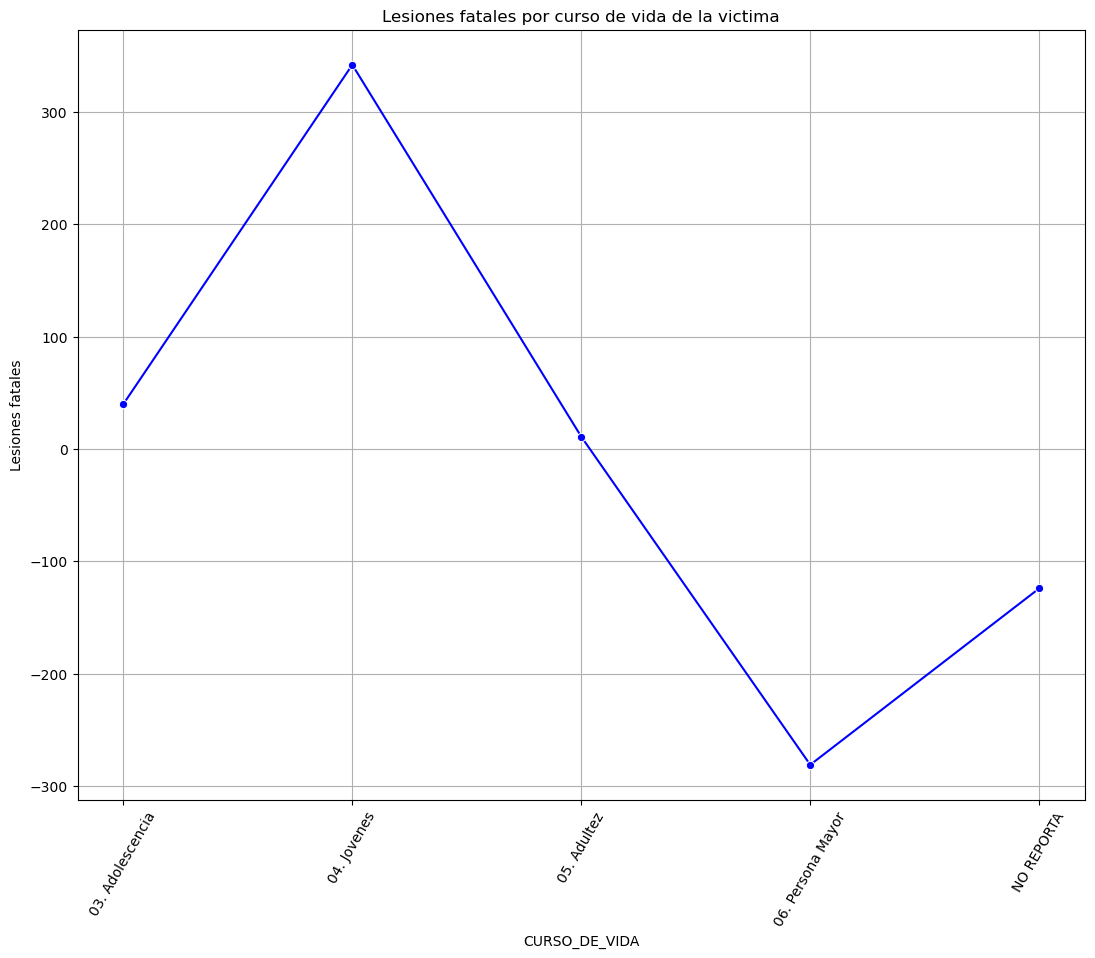

In [111]:
lesfatales = df[df['CLASIFICACIONES DELITO'] == 'Lesiones fatales']
lesfatales = lesfatales.groupby('CURSO_DE_VIDA').size().reset_index(name='Conteo')
lesfatales['lesfatal'] = lesfatales['Conteo'].diff()
plt.figure(figsize=(13, 10))
sns.lineplot(data=lesfatales, x='CURSO_DE_VIDA', y='lesfatal', marker='o', color='blue')
plt.title('Lesiones fatales por curso de vida de la victima')
plt.xlabel('CURSO_DE_VIDA')
plt.ylabel('Lesiones fatales')
plt.xticks(rotation=60)
plt.grid(True)

plt.show()

En el análisis realizado se ha podido visualizar cuales son los barrios con más hechos delictivos, como así también cuales son las armas medios más utilizadas en los delitos.

Se verificó que en el año 2020 en el curso de la cuarentena por la pandemia por Covid 19, los hechos cayeron, y se incrementaron abruptamente en el año 2021 en el Barrio Centro, cuando entre los años 2016/2019 se mantenenían practicamente sus valores, y el más bajo (exceptuando el 2020) fue en el año 2015.

De los hechos delictivos en el barrio Centro los más frecuentes ocurren en el mes de diciembre.

En cuanto a las lesiones fatales, efectivamente están relacionadas al curso de vida de la victima, los jovenes son los que más lesiones fatales sufren en los hechos.


In [127]:
df.columns

Index(['ORDEN', 'ARMAS_MEDIOS', 'BARRIOS_HECHO', 'ZONA', 'NOM_COMUNA', 'ANO',
       'MES', 'DIA', 'DIA_SEMANA', 'DESCRIPCION_CONDUCTA', 'CONDUCTA',
       'CLASIFICACIONES DELITO', 'EDAD', 'CURSO_DE_VIDA',
       'ESTADO_CIVIL_PERSONA', 'GENERO', 'MOVIL_AGRESOR', 'MOVIL_VICTIMA'],
      dtype='object')

In [128]:
df=df.drop(columns=["ORDEN"]) #elimino orden dado que solo es el id asignado y no me proporciona información

In [129]:
df2 = df.copy()

In [130]:
label_encoder = LabelEncoder()

#transformo variables categóricas en numéricas

In [131]:
df2['ARMAS_MEDIOS'] = label_encoder.fit_transform(df2['ARMAS_MEDIOS'])
df2['BARRIOS_HECHO'] = label_encoder.fit_transform(df2['BARRIOS_HECHO'])
df2['ZONA'] = label_encoder.fit_transform(df2['ZONA'])
df2['NOM_COMUNA'] = label_encoder.fit_transform(df2['NOM_COMUNA'])
df2['BARRIOS_HECHO'] = label_encoder.fit_transform(df2['BARRIOS_HECHO'])
df2['MES'] = label_encoder.fit_transform(df2['MES'])
df2['DIA_SEMANA'] = label_encoder.fit_transform(df2['DIA_SEMANA'])
df2['DESCRIPCION_CONDUCTA'] = label_encoder.fit_transform(df2['DESCRIPCION_CONDUCTA'])
df2['CONDUCTA'] = label_encoder.fit_transform(df2['CONDUCTA'])
df2['NOM_COMUNA'] = label_encoder.fit_transform(df2['NOM_COMUNA'])
df2['CLASIFICACIONES DELITO'] = label_encoder.fit_transform(df2['CLASIFICACIONES DELITO'])
df2['CURSO_DE_VIDA'] = label_encoder.fit_transform(df2['CURSO_DE_VIDA'])
df2['ESTADO_CIVIL_PERSONA'] = label_encoder.fit_transform(df2['ESTADO_CIVIL_PERSONA'])
df2['GENERO'] = label_encoder.fit_transform(df2['GENERO'])
df2['MOVIL_AGRESOR'] = label_encoder.fit_transform(df2['MOVIL_AGRESOR'])
df2['MOVIL_VICTIMA'] = label_encoder.fit_transform(df2['MOVIL_VICTIMA'])

In [132]:
df2. head()

,ARMAS_MEDIOS,BARRIOS_HECHO,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,3,186,3,0,2015,3,1,3,1,16,0,28,3,5,1,0,0
1,3,61,3,11,2015,3,1,3,4,31,1,40,4,4,1,0,0
2,3,455,3,1,2015,3,1,3,4,31,1,18,3,4,1,0,0
3,3,466,3,0,2015,3,1,3,4,31,1,37,4,5,0,0,0
4,3,147,3,3,2015,3,1,3,32,23,1,18,3,4,1,0,0


**Realizo una  matriz de correlación que muestra cómo las variables se correlacionan entre sí.**

C:\Users\Mariano\AppData\Local\Temp\ipykernel_7492\3232867323.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr().round(2)


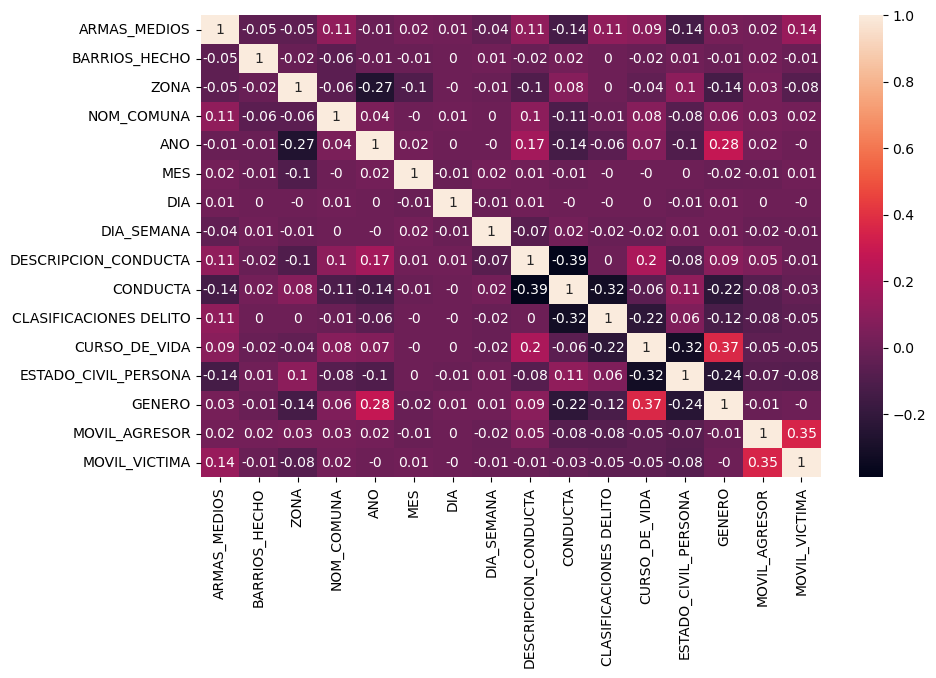

In [133]:
correlation_matrix = df2.corr().round(2)
correlation_matrix

plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

**Poseo baja correlación entre las variables, se usan las que más correlación tienen**

Text(0, 0.5, 'MOVIL_AGRESOR')

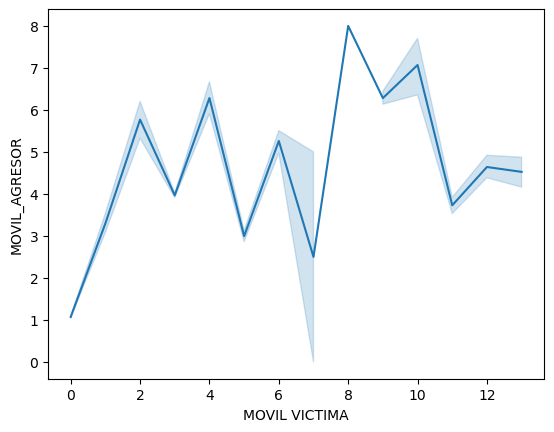

In [134]:

may_flights = df2
sns.lineplot(data=df2, x="MOVIL_VICTIMA", y="MOVIL_AGRESOR")
plt.xlabel('MOVIL VICTIMA')
plt.ylabel('MOVIL_AGRESOR')

Text(0, 0.5, 'CURSO DE VIDA')

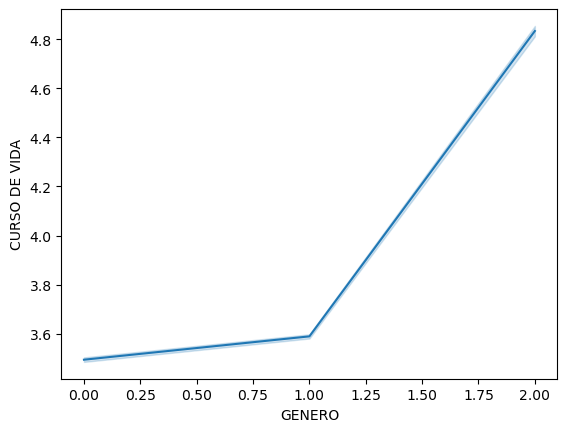

In [135]:
may_flights = df2
sns.lineplot(data=df2, x="GENERO", y="CURSO_DE_VIDA")
plt.xlabel('GENERO')
plt.ylabel('CURSO DE VIDA')

Vemos en el ejemplo anterior que la selección de los delincuentes de elegir victimas que sean hombres o mujeres, depende del curso de vida de las mismas